In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/air-quality-data-in-india/city_day.csv')


In [3]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


**Faetures**

--> City
--> Date (YYYY-MM-DD) 
--> PM2.5 (Particulate Matter 2.5 - micrometer) 
--> PM10 (Particulate Matter 10 - micrometer) 
--> SO2 (Sulphur Dioxide) 
--> NOx (Nitric x-Oxide) 
--> CO (Carbon Monoxide) 
--> O3 (Ozone) 
--> Benzene 
--> Toluene 
--> Xylene 
--> AQI 
--> AQI_Bucket

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


<Axes: >

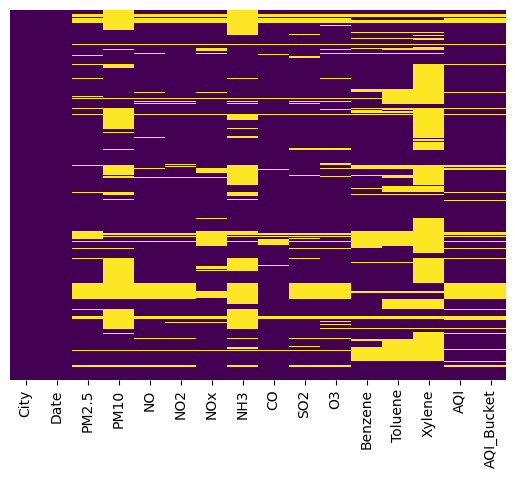

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [6]:
#Null values in each columns
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
# null value occurence in percentage
percentage = (df.isnull().sum()/df.shape[0])* 100

In [8]:
sort_percentage = percentage.sort_values(ascending = False)

In [9]:
sort_percentage

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
City           0.000000
Date           0.000000
dtype: float64

In [10]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [11]:
df.set_index('Date', inplace = True)

In [12]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [13]:
columns_to_transform = df.columns[1:13]

df[columns_to_transform] = df.groupby("City")[columns_to_transform].transform(lambda x: x.fillna(x.mean()))

In [14]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.000000,0.020000,0.000000,NaN,NaN
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.680000,5.500000,3.770000,NaN,NaN
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.800000,16.400000,2.250000,NaN,NaN
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.430000,10.140000,1.000000,NaN,NaN
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.010000,18.890000,2.780000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory


<Axes: ylabel='Date'>

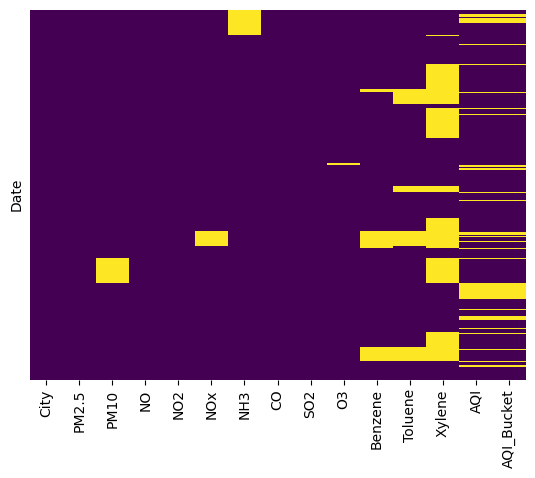

In [15]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [16]:
df.isnull().sum()

City              0
PM2.5             0
PM10           2009
NO                0
NO2               0
NOx            1169
NH3            2009
CO                0
SO2               0
O3              162
Benzene        2732
Toluene        4010
Xylene        13047
AQI            4681
AQI_Bucket     4681
dtype: int64

<Axes: ylabel='Date'>

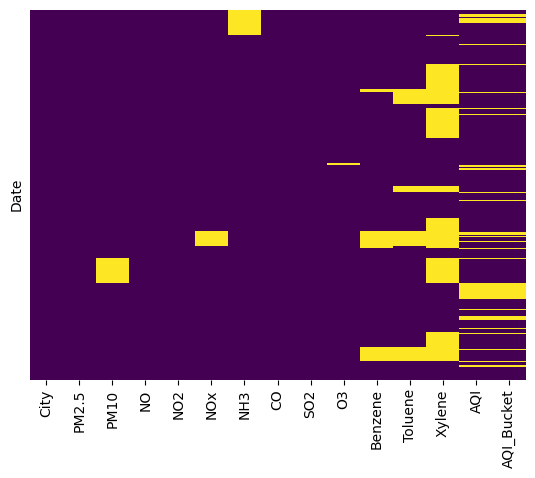

In [17]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# Exploratory Data Analysis

In [18]:
# Summary statistics
print(df.describe())

              PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  27522.000000  29531.000000  29531.000000  28362.000000   
mean      66.234841    116.228087     18.226745     28.641768     32.855058   
std       60.378014     77.430953     21.653948     23.595832     30.237747   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       31.830000     62.834404      6.110000     12.380000     14.080000   
50%       50.059571    101.880000     11.015184     23.240000     25.210000   
75%       76.345000    136.792500     22.595000     37.420000     42.757500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  27522.000000  29531.000000  29531.000000  29369.000000  26799.000000   
mean      23.024137      2.602122     15.639939     34.329319      3.263615   
std       22.524342      7.298071     18.101663    

/tmp/ipykernel_21/2698078356.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


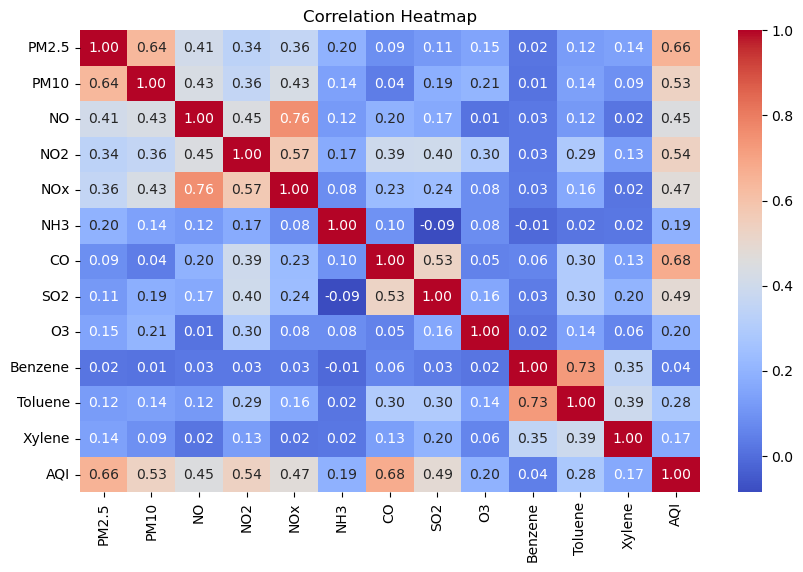

In [19]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

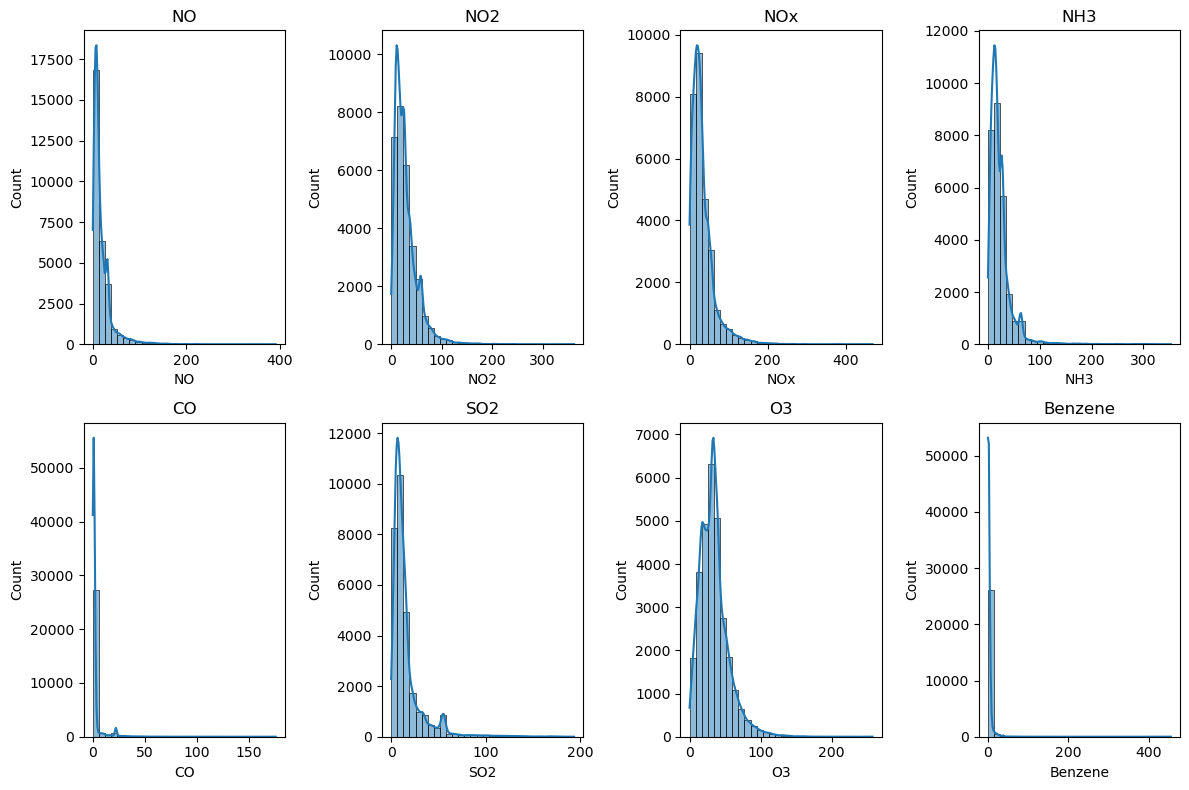

In [20]:
# Histograms for numerical columns
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[3:-1][:8]):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

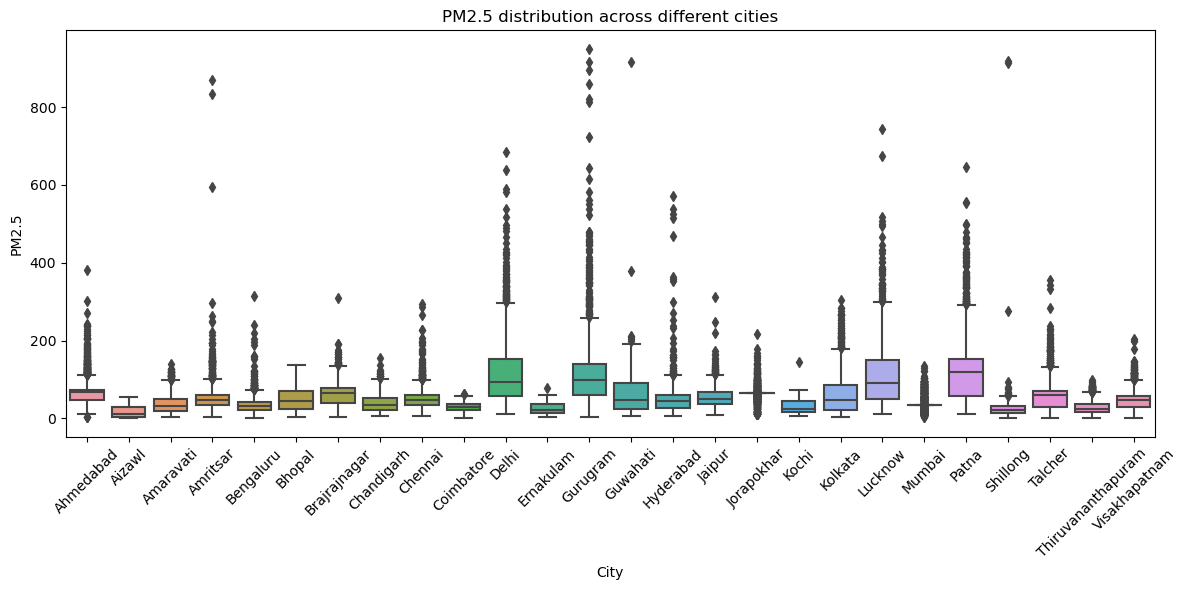

In [21]:
# Boxplots to compare the distribution of PM2.5 across different cities
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='PM2.5', data=df)
plt.xticks(rotation=45)
plt.title("PM2.5 distribution across different cities")
plt.tight_layout()
plt.show()

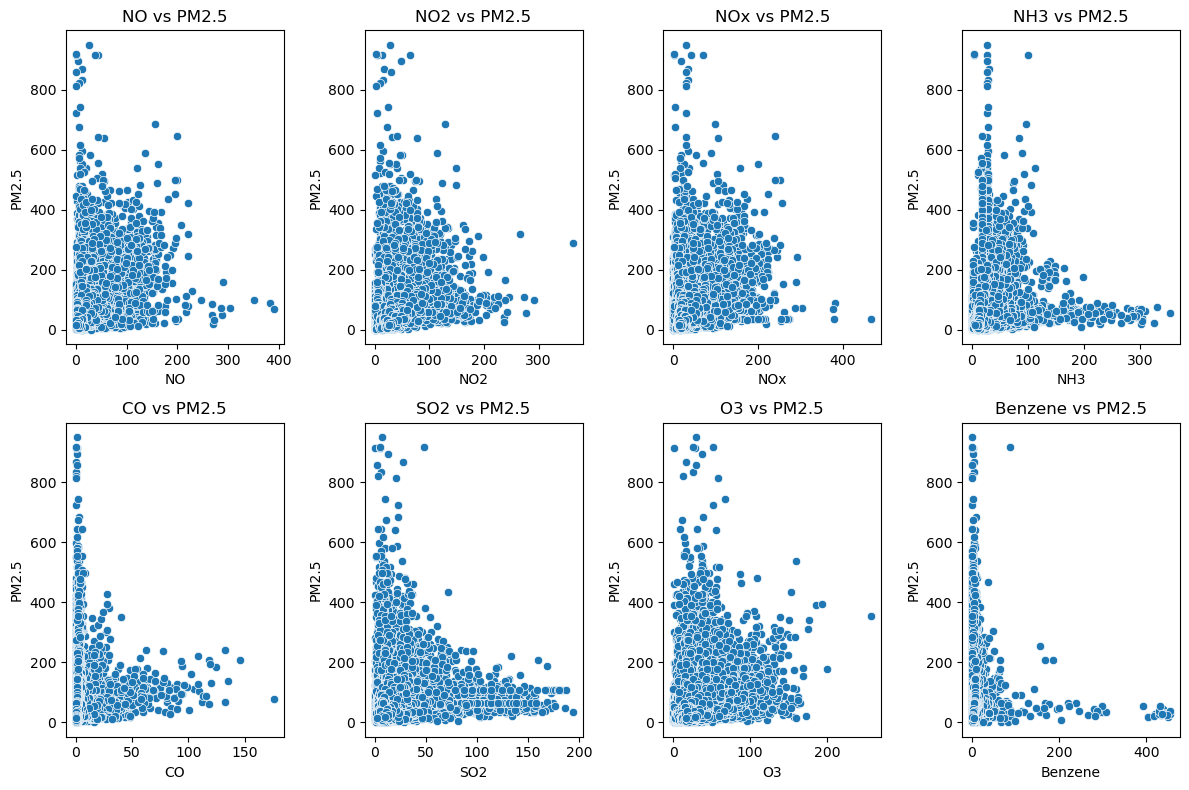

In [22]:
# Scatter plots for numerical columns
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[3:-1][:8]):  # Limiting to first 8 features
    plt.subplot(2, 4, i + 1)
    sns.scatterplot(x=feature, y='PM2.5', data=df)
    plt.title(f'{feature} vs PM2.5')
plt.tight_layout()
plt.show()

In [23]:
# Impute missing values using mean imputation for numerical features
numerical_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for feature in numerical_features:
    df[feature].fillna(df[feature].mean(), inplace=True)

# Model Building

In [24]:
# Selecting relevant features
selected_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Subset the DataFrame with selected features
df_selected = df[selected_features]

In [25]:
# Handling Numerical Features (Scaling)
scaler = MinMaxScaler()
df[selected_features[:-3]] = scaler.fit_transform(df[selected_features[:-3]])

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df[selected_features[:-3]], df['PM2.5'], test_size=0.2, random_state=42)

In [26]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [27]:
# 2. Decision Tree Regression
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

In [28]:
# 3. Random Forest Regression
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

In [29]:
# Model evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Performance metrics for {model_name}:")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("--------------------------------------------------------")

evaluate_model(y_test, y_pred_linear, 'Linear Regression')
evaluate_model(y_test, y_pred_decision_tree, 'Decision Tree Regression')
evaluate_model(y_test, y_pred_random_forest, 'Random Forest Regression')

Performance metrics for Linear Regression:
Mean Squared Error: 3.0687918496598665e-33
R-squared: 1.0
--------------------------------------------------------
Performance metrics for Decision Tree Regression:
Mean Squared Error: 7.726871672733323e-08
R-squared: 0.9999795597422411
--------------------------------------------------------
Performance metrics for Random Forest Regression:
Mean Squared Error: 1.7446091823430466e-08
R-squared: 0.9999953849031166
--------------------------------------------------------


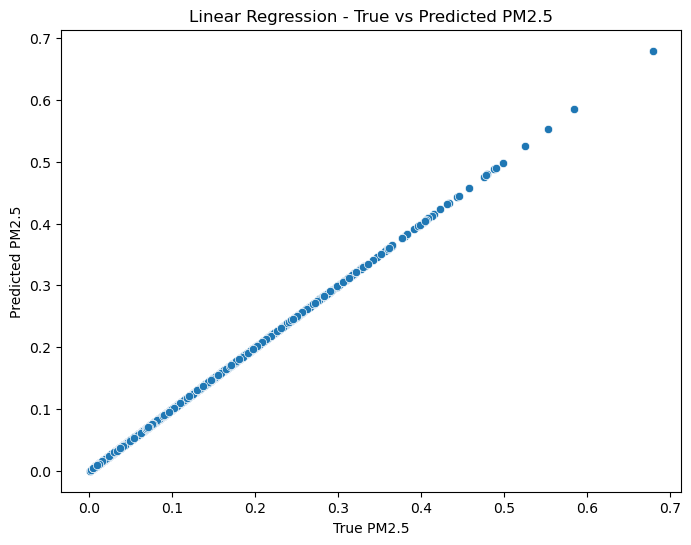

/tmp/ipykernel_21/1962417875.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='True PM2.5', shade=True)
/tmp/ipykernel_21/1962417875.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_linear, label='Linear Regression', shade=True)


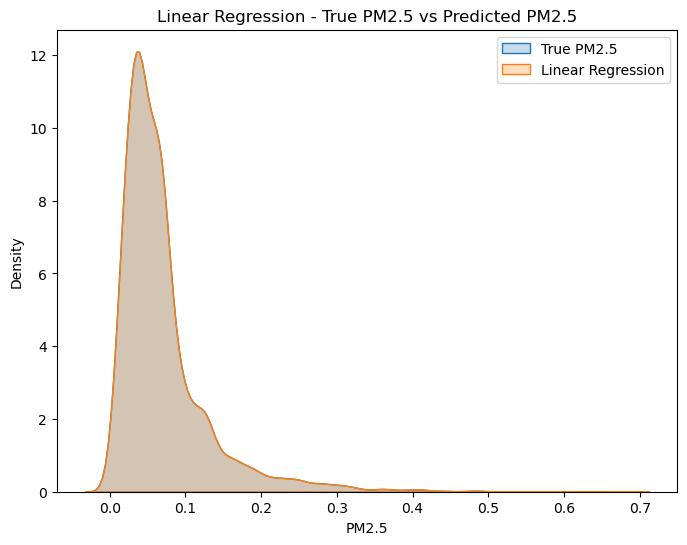

In [30]:
# Scatter plot for Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.xlabel('True PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Linear Regression - True vs Predicted PM2.5')
plt.show()

# Kernel Density plot for Linear Regression
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='True PM2.5', shade=True)
sns.kdeplot(y_pred_linear, label='Linear Regression', shade=True)
plt.xlabel('PM2.5')
plt.ylabel('Density')
plt.title('Linear Regression - True PM2.5 vs Predicted PM2.5')
plt.legend()
plt.show()


/tmp/ipykernel_21/828142941.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='True PM2.5', shade=True)
/tmp/ipykernel_21/828142941.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_linear, label='Linear Regression', shade=True)
/tmp/ipykernel_21/828142941.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_decision_tree, label='Decision Tree Regression', shade=True)
/tmp/ipykernel_21/828142941.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_random_forest, 

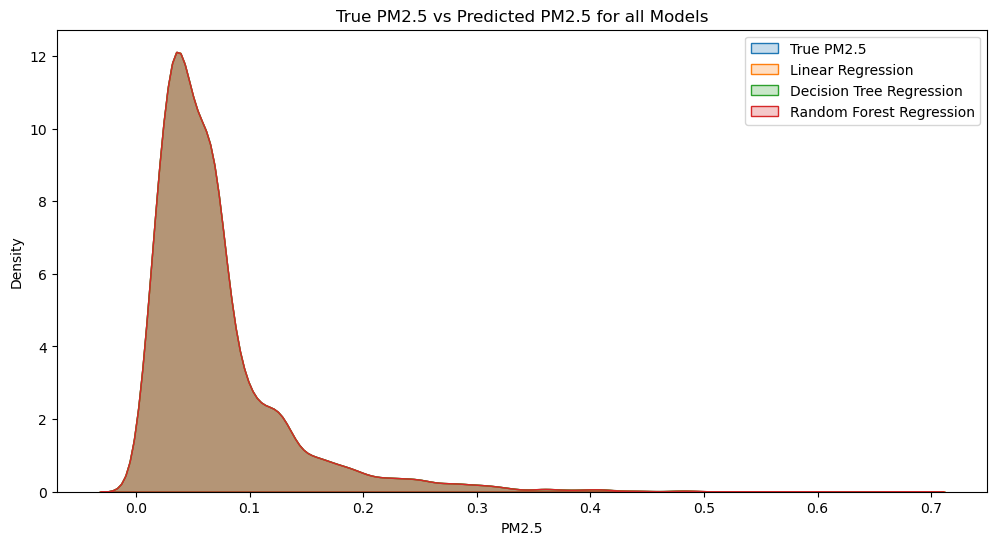

In [31]:
# Compare True PM2.5 vs Predicted PM2.5 for all models
plt.figure(figsize=(12, 6))
sns.kdeplot(y_test, label='True PM2.5', shade=True)
sns.kdeplot(y_pred_linear, label='Linear Regression', shade=True)
sns.kdeplot(y_pred_decision_tree, label='Decision Tree Regression', shade=True)
sns.kdeplot(y_pred_random_forest, label='Random Forest Regression', shade=True)
plt.xlabel('PM2.5')
plt.ylabel('Density')
plt.title('True PM2.5 vs Predicted PM2.5 for all Models')
plt.legend()
plt.show()